# Hands-on: Significance of a peak (the 750 GeV resonance) 
In this exercise we would like to test a theory predicting a new particle, with mass 750 GeV, which decays into a pair of photons. We have collected a data sample of 1000 photon pairs in the invariant mass range $500$-$1000\,\mathrm{GeV}$ 
measured in proton-proton collisions at the LHC. Theory predicts that 30 of these events are signal event from the decay of the new particle. Due to energy resolution the signal events follow a Gaussian distribution around $m = 750\,\mathrm{GeV}$ with a width of 30 GeV. In the considered mass range the background can be described by the probability density function $f_\mathrm{bck}(m) = \frac{1}{\xi} \exp(-\frac{m-m_\min}{\xi})$ with $\xi = 100\,\mathrm{GeV}$ and $m_\min = 500\,\mathrm{GeV}$.

The first step consists in choosing a test statistic. For this exercise, we will use the logarithm of the likelihood ratio (according to the Neyman–Pearson lemma):

$$ \ln Q(\{x\}) = \ln \frac{L(\{x\}|H_1)}{L(\{x\}|H_0)} $$

where $L$ are likelihood functions, $H_0$ is the background-only hypothesis (null hypothesis) and $H_1$ is the background-plus-signal hypothesis.

### Step1: We create a pdf for the background-only model and one for the brackground-plus-signal model (both normalised).

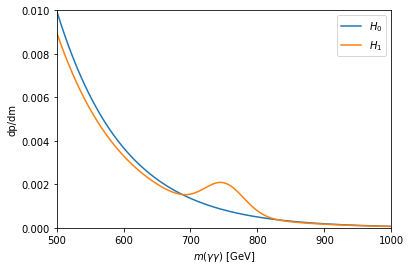

In [31]:
from scipy.stats import expon, norm

bkg = expon.freeze(loc=500, scale=100)
sig = norm.freeze(loc=750, scale=30)

import numpy as np
import matplotlib.pyplot as plt

m = np.linspace(500, 1000, 1000)
plt.plot(m, bkg.pdf(m), label='$H_0$')

def model(m, fsig):
    return (1-fsig)*bkg.pdf(m) + fsig*sig.pdf(m)

plt.plot(m, model(m, 0.1), label='$H_1$')

plt.ylim(0, 0.010)
plt.xlim(500, 1000)
plt.legend()
plt.xlabel('$m(\gamma\gamma)$ [GeV]')
plt.ylabel('dp/dm');

### Step 2: We create a function that returns the test statistic $\ln Q$ for a given dataset.

In [32]:
def LL(evts, nsig):
    fsig = nsig / len(evts)
    return np.sum(np.log(model(evts, fsig)))

def lnQ(evts, nsig):
    return LL(evts, nsig) - LL(evts, 0)

### Step 3: We generate 1000 toy Monte Carlo (MC) simulations for $H_0$ and for $H_1$. For each simulation, generate 1000 events. We plot one simulation for $H_0$ and one for $H_1$ on the same canvas.

In [33]:
ntoys = 10000
lnQ_B = []
for i in range(ntoys):
    toy = bkg.rvs(1000)
    lnQ_B.append(lnQ(toy, 30))

lnQ_SB = []
for i in range(ntoys):
    toyB = bkg.rvs(1000-30)
    toyS = sig.rvs(30)
    toy = np.concatenate((toyS, toyB))
    lnQ_SB.append(lnQ(toy, 30))

(500.0, 1000.0)

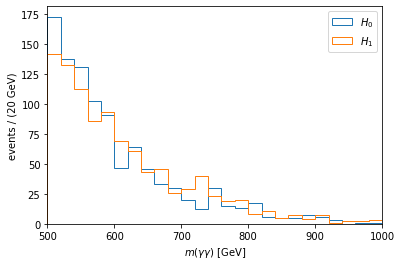

In [34]:
toyBonly = bkg.rvs(1000)

toyB = bkg.rvs(1000-30)
toyS = sig.rvs(30)
toySB = np.concatenate((toyS, toyB))

plt.hist(toyBonly, bins=25, range=(500, 1000), histtype='step', label='$H_0$');
plt.hist(toySB, bins=25, range=(500, 1000), histtype='step', label='$H_1$');
plt.legend()
plt.xlabel('$m(\gamma\gamma)$ [GeV]')
plt.ylabel('events / (20 GeV)')
plt.xlim(500, 1000)

### Step 4: For each toy MC, we calculate the test statistic and fill it in two histograms, one for $H_0$ and one for $H_1$. Plot the histograms on the same figure to compare them.

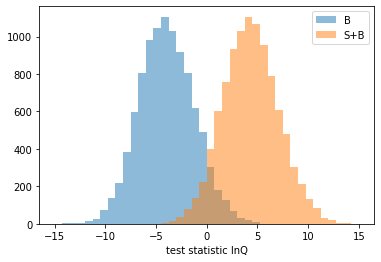

In [35]:
pltopts = dict(bins=40, range=(-15, 15), alpha=0.5)
plt.hist(lnQ_B, **pltopts, label='B');
plt.hist(lnQ_SB, **pltopts, label='S+B');
plt.legend()
plt.xlabel("test statistic lnQ");

### Step 5. For this exercise, we will use a test size $\alpha = 5\%$. We determine the critical test statistic and draw a line for where it is in the histogram above.

the critical test statistic is tc = 0.5575815375404541


Text(0.5, 0, 'test statistic lnQ')

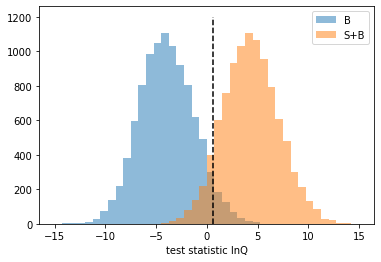

In [36]:
# test rule: the null hypothesis will be rejected if we observe t in the critical region t > tc
# alpha is the probability to reject H0 although it is actually true

# tc = np.sort(lnQ_B)[int(0.95*len(lnQ_B))]
tc = np.percentile(lnQ_B, 95)
print(f'the critical test statistic is tc = {tc}')

plt.hist(lnQ_B, **pltopts, label='B');
plt.hist(lnQ_SB, **pltopts, label='S+B');
plt.legend()
plt.plot([tc, tc], [0, 1200], color='black', linestyle='dashed');
plt.xlabel("test statistic lnQ")

### Step 6. Determine the power $1-\beta$ of the test.

In [37]:
# beta is the probability to keep H0 although it was actually false (i.e. H1 is true instead)
# a test has good performance if 1-beta is large

# The Neyman-Pearson lemma tells us that the likelihood-ratio Q 
# is the test sttistic that for a given size alpha gives us the highest power
oneminusbeta = np.sum(lnQ_SB>tc) / len(lnQ_SB)
print(f'1-beta = {oneminusbeta}')

1-beta = 0.9226


## Now it is your turn!
### Step 7.:  Read the data and plot them as a histogram. Evaluate the test-statistic for the data. What are the $p$-values of the data for both $H_0$ and $H_1$? To which significance do they correspond?

In [38]:
import pandas as pd
d = pd.read_csv('../data/two_photon_inv_masses.csv');

In [39]:
# determine and print the value of the test statistic for real data
# your code here


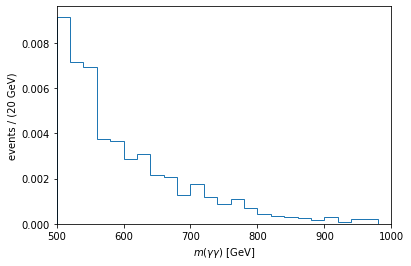

In [40]:
# plot the data (normalized to unity) along with the prediction for H0 and H1

# data
plt.hist(d['m'], bins=25, range=(500, 1000), histtype='step', label='data', density=True);
plt.xlabel('$m(\gamma\gamma)$ [GeV]')
plt.ylabel('events / (20 GeV)')
plt.xlim(500, 1000);

# plot models (H0 and H1)
# your code here


In [41]:
# the p-value quantifies how often, if the experiment were repeated, 
# one would obtain results at least as far away from the hypothesys
# H0 as the observed data

# determine and print the p-value for H0
# your code here


In [42]:
# determine and print the p-value for H1
# your code here


In [43]:
# p-values are probabilities of the tails of the test statistic distribution. 
# It is illustrative to compare them to the upper tail of a unit Gaussian.
# This yields the significance level Z = phi^{-1}(1-p)

p = 0.05 # replace by the actual p-value calculated above 
unitG = norm.freeze(loc=0, scale=1)
significance = unitG.ppf(1-p)
print(f'The observed significance level is {significance:.2f} sigmas')

The observed significance level is 1.64 sigmas


### Step 8: What is your conclusion on the existence of the new particle given the observed data?

According to our test size $\alpha=5\%$, the null hypothesis is rejected and we can claim the new particle was discovered (true / false)?

### Additional example: 
We now generate a sample of 50 signal events and 950 background events. What is the significance of the signal for a model H1 that predicts 50 signal events?

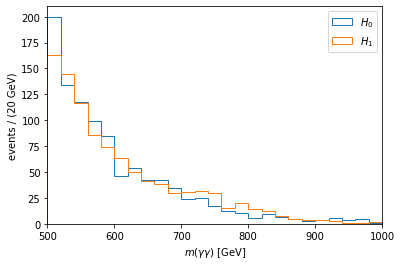

In [44]:
# create toy data set and visualize the peak
nsig = 50

np.random.seed(49825243)
toyBonly = bkg.rvs(1000)

toyB = bkg.rvs(1000-nsig)
toyS = sig.rvs(nsig)
toySB = np.concatenate((toyS, toyB))

plt.hist(toyBonly, bins=25, range=(500, 1000), histtype='step', label='$H_0$');
plt.hist(toySB, bins=25, range=(500, 1000), histtype='step', label='$H_1$');
plt.legend()
plt.xlabel('$m(\gamma\gamma)$ [GeV]')
plt.ylabel('events / (20 GeV)')
plt.xlim(500, 1000);

In [45]:
# To calculate the significance in the same way as before we would need a very large number
# of toy Monte Carlo simulation. Instead we assume that test-statistic (2*t) follows a
# chi2 distribution with 1 degree of freedom

t = lnQ(toySB, nsig)

# We assume that 2*t follows a chi2 distribution with 1 degree of freedom (Wilks' theorem), 
# i.e., sqrt(2*t) follows a Gaussian

z = np.sqrt(2*t)
print(f'The observed significance is {z:.2f} sigma')

# sanity check: p-value from chi2 distribution with one degree of freedom
from scipy import stats
import scipy.stats as st

p = 1 - stats.chi2.cdf(2*t, 1)
n_sigma_two_tailed = st.norm.ppf(1-p/2.)
print(f"{n_sigma_two_tailed:.2f}")

The observed significance is 4.97 sigma
4.97
